In [1]:
# Import the libraries for data wrangling
import pandas as pd
import numpy as np

# Import the libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Data Wrangling
The purpose of this notebook will be to import all the intermediate datasets, clean them, and merge them together for use in EDA notebook.

I will work through each dataframe one by one, cleaning it up, finally merging them at the end to create a intermediate merged dataframe for EDA. Some things I will focus on cleaning is null values, outliers, and any other strange entries.

For many of the numerical columns here, the are range of values are extremely high. Therefore, it may be worth coming back to this point to set all the >.99 quantile to a single value (scaled down) and use a scalar preprocessing step. This may improve the machine learning score.

In [2]:
# Import the intermediate training data
train_df = pd.read_csv('.\Intermediate_Data\\intermediate_train.csv', encoding='utf-8', index_col=0)

# Import the intermediate bureau data
bureau_df = pd.read_csv('.\Intermediate_Data\\intermediate_bureau.csv', encoding='utf-8',index_col=0)

# Import the intermediate credit data
credit_df = pd.read_csv('.\Intermediate_Data\\intermediate_credit.csv', encoding='utf-8', index_col=0)

# Import the merge intermediate previous applications and installment adata
prev_instal_df = pd.read_csv('.\Intermediate_Data\\prev_instal.csv', encoding='utf-8', index_col=0)

### Training Data

In [3]:
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,VALID_MOBILE,HOUSING,DOCUMENTS,ENQUIRIES
0,100002,1,Cash loans,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,...,NaN,0,2.0,0.139376,0.262949,0.083037,True,6.666667,1,1.0
1,100003,0,Cash loans,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,...,NaN,0,0.0,NaN,0.622246,0.311267,True,3.333333,1,0.0
2,100004,0,Revolving loans,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,...,26.0,0,0.0,0.729567,0.555912,NaN,True,6.666667,0,0.0
3,100006,0,Cash loans,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,...,NaN,0,0.0,NaN,0.650442,NaN,True,6.666667,1,0.0
4,100007,0,Cash loans,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,...,NaN,0,0.0,NaN,0.322738,NaN,True,6.666667,1,0.0


In [4]:
# Let's start by looking for null values in each column. I'll fill them in with appropriate values
for col in train_df:
    print (col, sum(train_df[col].isnull()))

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
REG_REGION_NOT_LIVE_REGION 0
DEF_30_CNT_SOCIAL_CIRCLE 1021
EXT_SOURCE_3 60965
EXT_SOURCE_2 660
EXT_SOURCE_1 173378
VALID_MOBILE 0
HOUSING 0
DOCUMENTS 0
ENQUIRIES 0


In [5]:
# Let's define a function that takes a dataframe and returns all the columns with null values
def NULL_COLUMNS(df):
    '''Returns all the columns with null values'''
    null_list = []
    for col in df:
        if sum(df[col].isnull()) != 0:
            null_list.append(col)
    return null_list

# Let's check which columns have null values in the training data
print (NULL_COLUMNS(train_df))

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OWN_CAR_AGE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1']


In [6]:
# Let's take a look at the 12 null values in AMT_ANNUITY
train_df[train_df['AMT_ANNUITY'].isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,VALID_MOBILE,HOUSING,DOCUMENTS,ENQUIRIES
47531,155054,0,Cash loans,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,...,NaN,0,0.0,0.372334,0.626896,NaN,True,6.666667,1,2.0
50035,157917,0,Cash loans,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,...,NaN,0,0.0,0.468660,0.727274,NaN,True,6.666667,1,2.0
51594,159744,0,Cash loans,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,...,NaN,0,0.0,0.452534,0.738370,0.885980,True,3.333333,1,2.0
55025,163757,0,Cash loans,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,...,NaN,0,0.0,0.220095,0.566316,0.336803,True,6.666667,1,5.0
59934,169487,0,Cash loans,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,...,4.0,0,0.0,0.177704,0.583947,0.647350,True,3.333333,1,7.0
75873,187985,0,Cash loans,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,...,8.0,0,0.0,0.425893,0.667564,0.339389,True,6.666667,1,11.0
89343,203726,0,Cash loans,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,...,2.0,0,0.0,0.297087,0.154811,0.682126,True,6.666667,1,2.0
123872,243648,0,Cash loans,Y,0,202500.0,929088.0,NaN,720000.0,Unaccompanied,...,NaN,0,0.0,0.581484,0.510934,0.400723,True,6.666667,1,6.0
207186,340147,0,Cash loans,N,0,171000.0,486000.0,NaN,486000.0,Unaccompanied,...,NaN,1,0.0,0.391055,0.706306,NaN,True,6.666667,1,4.0
227939,364022,0,Cash loans,Y,0,315000.0,628069.5,NaN,499500.0,Unaccompanied,...,NaN,0,0.0,0.431192,0.618698,NaN,True,3.333333,1,3.0


These entries don't have any reoccuring pattern and no other strange values in any other columns. It's unlikely that there are due to mistakes in entries. Let's look at the lowest values in the column. There is a possibility that these entries are inputted as placeholders for 0's.

In [7]:
# Let's take a look at the dataframe sorted by amount annuity.
train_df.sort_values('AMT_ANNUITY').head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,VALID_MOBILE,HOUSING,DOCUMENTS,ENQUIRIES
277186,421207,0,Cash loans,Y,0,31500.0,45000.0,1615.5,45000.0,Unaccompanied,...,NaN,0,0.0,0.595456,0.584362,NaN,True,6.666667,1,3.0
145396,268596,0,Cash loans,Y,0,67500.0,45000.0,1980.0,45000.0,Unaccompanied,...,NaN,0,0.0,0.719491,0.437338,0.654626,True,6.666667,1,2.0
73549,185284,0,Cash loans,Y,0,94500.0,45000.0,1980.0,45000.0,Unaccompanied,...,NaN,0,0.0,0.610991,0.120238,NaN,True,6.666667,1,6.0
125236,245237,0,Cash loans,Y,0,130500.0,49500.0,1993.5,49500.0,Unaccompanied,...,3.0,0,2.0,NaN,0.607531,NaN,True,6.666667,1,0.0
17048,119887,0,Cash loans,N,0,90000.0,53910.0,2052.0,45000.0,Unaccompanied,...,NaN,0,0.0,0.537070,0.159679,NaN,True,6.666667,1,6.0
222573,357812,0,Cash loans,Y,0,225000.0,54000.0,2164.5,54000.0,Unaccompanied,...,NaN,0,0.0,NaN,0.773074,NaN,True,3.333333,1,0.0
227195,363161,0,Cash loans,N,0,36000.0,45000.0,2164.5,45000.0,Unaccompanied,...,NaN,0,0.0,NaN,0.291443,NaN,True,6.666667,1,0.0
185993,315613,0,Cash loans,Y,0,157500.0,56880.0,2173.5,45000.0,Unaccompanied,...,NaN,0,2.0,0.622922,0.750537,0.790174,True,6.666667,1,2.0
92141,206992,0,Cash loans,Y,2,180000.0,45000.0,2187.0,45000.0,Unaccompanied,...,NaN,0,0.0,0.710674,0.405535,0.454585,True,10.000000,1,1.0
45476,152670,0,Cash loans,N,0,81000.0,45000.0,2187.0,45000.0,Unaccompanied,...,NaN,0,0.0,NaN,0.706202,0.613153,True,6.666667,1,0.0


The lowest value appears to be 1615.5. Filling in the null's here wouldn't make sense as a 0 value would represent their monthly distribution is 0. As a result, I feel safer filling the value in with the median.

In [8]:
# The lowest value appears to be 1615.5, I will assume that the null values are representative of 0's. Fill accordingly
train_df['AMT_ANNUITY'].fillna(train_df['AMT_ANNUITY'].median(), inplace=True)

In [9]:
# Next, I'll look at AMT_GOODS_PRICE which appears to have 278 null values.
train_df[train_df['AMT_GOODS_PRICE'].isnull()].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,DAYS_ID_PUBLISH,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,HOUSING,DOCUMENTS,ENQUIRIES
count,278.000000,278.000000,278.000000,278.000000,2.780000e+02,278.000000,0.0,278.000000,278.000000,278.000000,...,278.000000,0.0,278.000000,278.000000,210.000000,277.000000,134.000000,278.000000,278.000000,278.000000
mean,290564.467626,0.075540,0.517986,129759.053957,2.796313e+05,13981.564748,NaN,0.018315,-14121.985612,26828.183453,...,-2804.431655,NaN,0.007194,0.136691,0.478324,0.513566,0.453761,6.928058,0.910072,1.597122
std,104330.601243,0.264737,0.804792,78803.104547,1.898921e+05,9494.603948,NaN,0.012255,4105.975831,99407.713973,...,1577.411072,NaN,0.084666,0.419755,0.188762,0.180112,0.202885,1.470536,0.310768,1.835154
min,100837.000000,0.000000,0.000000,40500.000000,1.350000e+05,6750.000000,NaN,0.000533,-23710.000000,-15871.000000,...,-6085.000000,NaN,0.000000,0.000000,0.000527,0.005691,0.096934,3.333333,0.000000,0.000000
25%,199671.250000,0.000000,0.000000,90000.000000,1.800000e+05,9000.000000,NaN,0.009175,-16865.750000,-2727.000000,...,-4267.750000,NaN,0.000000,0.000000,0.339288,0.407925,0.275667,6.666667,1.000000,0.000000
50%,294708.000000,0.000000,0.000000,112500.000000,2.250000e+05,11250.000000,NaN,0.018029,-13593.500000,-1470.000000,...,-2794.000000,NaN,0.000000,0.000000,0.509188,0.559014,0.449281,6.666667,1.000000,1.000000
75%,383434.000000,0.000000,1.000000,157500.000000,2.700000e+05,13500.000000,NaN,0.025164,-10674.500000,-623.500000,...,-1399.000000,NaN,0.000000,0.000000,0.621648,0.652740,0.609218,6.666667,1.000000,2.000000
max,454852.000000,1.000000,4.000000,783000.000000,1.350000e+06,67500.000000,NaN,0.072508,-7712.000000,365243.000000,...,-11.000000,NaN,1.000000,3.000000,0.863363,0.790072,0.858466,10.000000,2.000000,10.000000


In [10]:
# There aren't any particularly weird values here either. Perhaps it's another placeholder for 0's
train_df.sort_values('AMT_GOODS_PRICE').head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,VALID_MOBILE,HOUSING,DOCUMENTS,ENQUIRIES
298542,445866,0,Cash loans,Y,1,135000.0,48519.0,4576.5,40500.0,Unaccompanied,...,NaN,0,4.0,0.560284,0.258556,NaN,True,10.000000,1,0.0
202635,334903,0,Cash loans,Y,0,45000.0,50940.0,5089.5,45000.0,"Spouse, partner",...,NaN,0,0.0,0.537070,0.253483,0.834698,True,6.666667,1,1.0
7438,108672,0,Cash loans,Y,0,90000.0,50940.0,5535.0,45000.0,Unaccompanied,...,NaN,0,1.0,NaN,0.505485,NaN,True,6.666667,1,0.0
51295,159395,0,Cash loans,Y,0,72000.0,45000.0,4513.5,45000.0,Unaccompanied,...,7.0,0,0.0,0.726711,0.668694,NaN,True,6.666667,1,0.0
303973,452185,0,Cash loans,N,2,189000.0,45000.0,4257.0,45000.0,Unaccompanied,...,NaN,0,0.0,0.459690,0.436865,NaN,True,6.666667,1,2.0
214287,348315,0,Cash loans,Y,0,90000.0,45000.0,4513.5,45000.0,Unaccompanied,...,NaN,0,0.0,NaN,0.591011,NaN,True,6.666667,1,2.0
285785,430989,0,Cash loans,N,0,67500.0,45000.0,4846.5,45000.0,Unaccompanied,...,7.0,0,0.0,0.729567,0.695367,NaN,True,6.666667,1,2.0
196000,327270,0,Cash loans,N,0,90000.0,50940.0,6174.0,45000.0,Unaccompanied,...,0.0,0,0.0,0.590233,0.399072,NaN,True,6.666667,1,1.0
233214,370124,0,Cash loans,Y,0,427500.0,49752.0,6034.5,45000.0,Unaccompanied,...,11.0,1,0.0,0.438281,0.670697,0.368119,True,9.666667,1,2.0
274540,418208,0,Cash loans,Y,0,112500.0,49752.0,5350.5,45000.0,"Spouse, partner",...,NaN,0,0.0,0.394495,0.405255,NaN,True,6.666667,1,1.0


In [11]:
# Similar rationale for AMT_ANNUITY. I will fill with median
train_df['AMT_GOODS_PRICE'].fillna(train_df['AMT_GOODS_PRICE'].median(), inplace=True)

In [12]:
# Next, I'll look at NAME_TYPE_SUITE which appears to have 1292 null values
# Note that this column refers to if the client was accompanied. I meant to use this column as a binary variable

# Since it makes sense for null entries to be analogous with Unacompanied, I will fit it in accordingly.
train_df['NAME_TYPE_SUITE'].fillna(value='Unaccompanied', inplace=True)

In [13]:
# At this point, I will convert the column to a binary variable. 0 = unaccompanied, 1 = everything else
# Define the function to do so
suite_convert = (lambda x: 0 if str(x) == 'Unaccompanied' else 1)

# Apply the function to the series
train_df['NAME_TYPE_SUITE'] = train_df['NAME_TYPE_SUITE'].apply(suite_convert)

In [14]:
# Sanity check to make sure the binary conversion worked
assert (list(train_df['NAME_TYPE_SUITE'].unique()) == [0, 1])

In [15]:
# Let's look at OWN_CAR_AGE. Here it would be reasonable to assume that null values here represent that the client
# does not own a car. As a result, I will first check if there are 0 entries, otherwise I will let -1 represent non-owners
print(sum(train_df['OWN_CAR_AGE'] == 0.0))
print (sum(train_df['OWN_CAR_AGE'].isnull()))

2134
202929


In [16]:
# I see that there are far more null values than there are 0 entries. I expect them to be analogous in this situation.
# I will fill the null values here with 0's.
train_df['OWN_CAR_AGE'].fillna(0, inplace=True)

In [17]:
# Lastly, I will go through DEF_30_CNT_SOCIAL_CIRCLE which is a count of observable defaults within social surrounds within
# the last 30 days.
train_df[train_df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull()].head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,VALID_MOBILE,HOUSING,DOCUMENTS,ENQUIRIES
68,100080,0,Revolving loans,N,1,157500.0,450000.0,22500.0,450000.0,0,...,0.0,0,NaN,0.832785,0.123888,0.411506,True,6.666667,0,5.0
394,100457,0,Revolving loans,Y,0,211500.0,270000.0,13500.0,270000.0,0,...,7.0,0,NaN,NaN,0.656779,0.409581,True,6.666667,0,0.0
397,100460,0,Revolving loans,N,0,315000.0,540000.0,27000.0,540000.0,0,...,0.0,0,NaN,0.633032,0.349457,0.439873,True,6.666667,0,0.0
457,100527,0,Revolving loans,N,0,112500.0,270000.0,13500.0,270000.0,0,...,0.0,0,NaN,0.669057,0.696210,0.239312,True,6.666667,1,1.0
1042,101209,0,Revolving loans,N,0,180000.0,540000.0,27000.0,540000.0,0,...,7.0,0,NaN,0.490258,0.640041,NaN,True,6.666667,0,1.0
1064,101235,0,Revolving loans,Y,0,720000.0,1350000.0,67500.0,1350000.0,0,...,0.0,0,NaN,NaN,0.450422,NaN,True,6.666667,0,0.0
1156,101358,0,Revolving loans,N,0,337500.0,585000.0,29250.0,585000.0,0,...,0.0,0,NaN,0.824595,0.105875,NaN,True,10.000000,0,0.0
1209,101424,0,Revolving loans,Y,1,360000.0,855000.0,42750.0,855000.0,0,...,0.0,0,NaN,0.331251,0.682178,0.546275,True,3.333333,0,1.0
1486,101746,0,Revolving loans,Y,2,126000.0,180000.0,9000.0,180000.0,0,...,24.0,0,NaN,NaN,0.362577,NaN,True,10.000000,0,0.0
1743,102038,0,Revolving loans,N,2,337500.0,900000.0,45000.0,900000.0,0,...,14.0,1,NaN,0.152866,0.741622,NaN,True,3.333333,0,2.0


In [18]:
# Strangely, a larg eamount of revoling loans are visible at these null entries. Let's explore this further
train_df[train_df['DEF_30_CNT_SOCIAL_CIRCLE'].isnull()]['NAME_CONTRACT_TYPE'].value_counts()

Revolving loans    1020
Cash loans            1
Name: NAME_CONTRACT_TYPE, dtype: int64

In [19]:
# 1020 / 1021 of the null entries here are revolving loans. Let's look at revolving loans entries
train_df[train_df['NAME_CONTRACT_TYPE'] == 'Revolving loans'].describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,DAYS_ID_PUBLISH,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,HOUSING,DOCUMENTS,ENQUIRIES
count,29279.000000,29279.000000,29279.000000,2.927900e+04,2.927900e+04,29279.000000,2.927900e+04,29279.000000,29279.000000,29279.000000,...,29279.000000,29279.000000,29279.000000,28259.000000,22972.000000,29218.000000,13916.000000,29279.000000,29279.000000,29279.000000
mean,278704.656375,0.054783,0.483828,1.662170e+05,3.240180e+05,16316.822637,3.269044e+05,0.171078,0.022014,-14875.175313,...,-2748.300113,4.306704,0.022132,0.131356,0.507351,0.523795,0.493609,6.720972,0.109362,1.767034
std,103072.860299,0.227561,0.743074,1.260286e+05,2.366935e+05,13049.525707,2.370931e+05,0.376584,0.014676,4385.065299,...,1564.219342,10.341564,0.147115,0.463717,0.195822,0.184172,0.211463,1.743798,0.359497,2.100569
min,100004.000000,0.000000,0.000000,2.700000e+04,1.350000e+05,6750.000000,4.500000e+04,0.000000,0.000290,-25229.000000,...,-6265.000000,0.000000,0.000000,0.000000,0.000527,0.000001,0.017897,3.333333,0.000000,0.000000
25%,189842.500000,0.000000,0.000000,9.900000e+04,1.800000e+05,9000.000000,1.800000e+05,0.000000,0.010147,-18368.000000,...,-4187.500000,0.000000,0.000000,0.000000,0.365617,0.412668,0.322226,6.666667,0.000000,0.000000
50%,278540.000000,0.000000,0.000000,1.350000e+05,2.700000e+05,13500.000000,2.700000e+05,0.000000,0.019101,-14583.000000,...,-2851.000000,0.000000,0.000000,0.000000,0.529890,0.571315,0.493037,6.666667,0.000000,1.000000
75%,367922.000000,0.000000,1.000000,2.025000e+05,3.600000e+05,18000.000000,3.825000e+05,0.000000,0.030755,-11268.000000,...,-1287.500000,4.000000,0.000000,0.000000,0.665855,0.666797,0.665657,6.666667,0.000000,3.000000
max,456240.000000,1.000000,12.000000,4.500000e+06,2.250000e+06,225000.000000,2.250000e+06,1.000000,0.072508,-7676.000000,...,0.000000,91.000000,1.000000,34.000000,0.882530,0.855000,0.942680,10.000000,3.000000,20.000000


There are over 29,000 entries for revolving cash loans. Although there is a connection between null values in the DEF_30_CNT_SOCIAL_CIRCLE and revolving cash loans, I can't create any definite connection. 

If I assume that the information from this column is retrieved by the bank and not provided by the client, I can take these null values as that such information could be found on the client.

Regardless, for now, I will use -1 as a placeholder for these null values

In [20]:
# let's fill these values with -1's
train_df['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(-1, inplace=True)

In [21]:
NULL_COLUMNS(train_df)

['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1']

Let's address the negative values in the EXT_SOURCE[1,2,3]. Since I don't know what these variables actually represent, there may be increased chance of these variables being fill incorrectly.

In [22]:
# Use .describe on the EXT_SOURCE columns
train_df[NULL_COLUMNS(train_df)].describe()

,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1
count,246546.000000,3.068510e+05,134133.000000
mean,0.510853,5.143927e-01,0.502130
std,0.194844,1.910602e-01,0.211062
min,0.000527,8.173617e-08,0.014568
25%,0.370650,3.924574e-01,0.334007
50%,0.535276,5.659614e-01,0.505998
75%,0.669057,6.636171e-01,0.675053
max,0.896010,8.549997e-01,0.962693


It appears that of the three, EXT_SOURCE_2 is made up of very small values. Additionally, the min value for all three columns > 0. However, if this is a score, it would not make sense to fill all the null values with 0's as it would be disadvantage to the clients without the score.

I will fill them with the median of each column.

In [23]:
for EXT_SOURCE in NULL_COLUMNS(train_df):
    train_df[EXT_SOURCE].fillna(train_df[EXT_SOURCE].median(), inplace=True)

In [24]:
# Sanity check to make sure there are no more null values
assert NULL_COLUMNS(train_df) == []

Now that I have went through all the null values, I'm going to backtrack and look for irregular values. Some columns to note are DAYS_EMPLOYED, DAYS_REGISTRATION, and DAYS_ID_PUBLISH. These three columns should all be negative values as it refers to days prior to the current application. We'll go through these one at a time and address them accordingly.

In [25]:
train_df[['DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']].describe()

,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
count,307511.000000,307511.000000,307511.000000
mean,63815.045904,-4986.120328,-2994.202373
std,141275.766519,3522.886321,1509.450419
min,-17912.000000,-24672.000000,-7197.000000
25%,-2760.000000,-7479.500000,-4299.000000
50%,-1213.000000,-4504.000000,-3254.000000
75%,-289.000000,-2010.000000,-1720.000000
max,365243.000000,0.000000,0.000000


In [26]:
# Let's take a look at these positive values
train_df.sort_values('DAYS_EMPLOYED', ascending=False).head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,VALID_MOBILE,HOUSING,DOCUMENTS,ENQUIRIES
146327,269659,0,Cash loans,Y,0,94500.0,518562.0,20695.5,463500.0,0,...,0.0,0,0.0,0.629674,0.401487,0.505998,True,6.666667,1,3.0
229266,365545,0,Revolving loans,Y,0,135000.0,157500.0,7875.0,157500.0,0,...,21.0,0,0.0,0.749022,0.415477,0.505998,True,10.000000,0,0.0
157475,282539,0,Cash loans,Y,0,36900.0,675000.0,20668.5,675000.0,0,...,10.0,0,0.0,0.535276,0.671445,0.505998,True,6.666667,1,0.0
229294,365579,0,Cash loans,N,0,270000.0,513531.0,20362.5,459000.0,0,...,0.0,0,0.0,0.484851,0.681115,0.505998,True,6.666667,1,5.0
157480,282544,0,Cash loans,Y,1,180000.0,808650.0,23773.5,675000.0,1,...,6.0,0,2.0,0.535276,0.052368,0.505998,True,6.666667,1,0.0
80598,193438,0,Cash loans,Y,0,202500.0,273636.0,16870.5,247500.0,0,...,0.0,0,0.0,0.828729,0.248081,0.505998,True,6.666667,1,5.0
229285,365566,0,Cash loans,N,0,144000.0,315000.0,20277.0,315000.0,0,...,3.0,0,0.0,0.501075,0.612327,0.505998,True,10.000000,1,4.0
80597,193435,0,Cash loans,Y,0,135000.0,526491.0,28179.0,454500.0,0,...,0.0,0,0.0,0.510090,0.382560,0.505998,True,6.666667,1,1.0
157481,282545,0,Cash loans,Y,0,94500.0,454500.0,14661.0,454500.0,0,...,5.0,0,0.0,0.707699,0.650278,0.505998,True,6.666667,1,0.0
229277,365557,0,Cash loans,Y,0,67500.0,814041.0,23931.0,679500.0,0,...,0.0,0,0.0,0.600658,0.541097,0.505998,True,6.666667,1,8.0


In [27]:
# It looks like 365243 is a reoccuring value. Additionally, that's approximately100 years
# Let's check how often it occurs
train_df[train_df['DAYS_EMPLOYED'] == 365243].shape

(55374, 29)

In [28]:
# Let's see how many values are non-negatives
train_df[train_df['DAYS_EMPLOYED'] > -1].shape

(55376, 29)

There are nearly 55 thousand entries with this value. This is definitely a placeholder value with a meaning. Out of 55376 non-negative values, 55374 have 365243 as the inputted value (the other 2 are 0's). I believe that these values indicate currently unemployed clients (as of time of application).

Since I would like to use this column as a numerical variable, I will convert these the 365243 values to 0's.

In [29]:
# Replace the 365243's with 0's
train_df['DAYS_EMPLOYED'].replace(to_replace=365243, value=0, inplace=True)

In [30]:
train_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,DAYS_ID_PUBLISH,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,HOUSING,DOCUMENTS,ENQUIRIES
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,307511.000000,307511.000000,307511.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.487841,5.383163e+05,0.187613,0.020868,-16036.995067,...,-2994.202373,4.101879,0.015144,0.139624,0.515695,5.145034e-01,0.504311,6.834563,0.930155,2.145686
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.461065,3.692890e+05,0.390403,0.013831,4363.988632,...,1509.450419,9.009514,0.122126,0.450781,0.174736,1.908699e-01,0.139408,1.687241,0.344295,2.290869
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,0.000290,-25229.000000,...,-7197.000000,0.000000,0.000000,-1.000000,0.000527,8.173617e-08,0.014568,3.333333,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.000000,0.010006,-19682.000000,...,-4299.000000,0.000000,0.000000,0.000000,0.417100,3.929737e-01,0.505998,6.666667,1.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.000000,0.018850,-15750.000000,...,-3254.000000,0.000000,0.000000,0.000000,0.535276,5.659614e-01,0.505998,6.666667,1.000000,2.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.000000,0.028663,-12413.000000,...,-1720.000000,5.000000,0.000000,0.000000,0.636376,6.634218e-01,0.505998,6.666667,1.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,1.000000,0.072508,-7489.000000,...,0.000000,91.000000,1.000000,34.000000,0.896010,8.549997e-01,0.962693,10.000000,4.000000,262.000000


At this point, I will skip removing rows with outliers from the training data. This is because each row represents a single client. If I were to remove outlier rows, the remainder of the data for the client would be lost.

Instead, I will replace the outliers with a practical value.

Noting some outliers:
CNT_CHILDREN: max @ 19,  
OWN_CAR_AGE: max @91.0 (could make sense for older car collectors), 
DEF_30_CNT_SOCIAL_CIRCLE: max @ 34.0, 
ENQUIRIES: max @ 262.0

To explore for outliers:
AMT_INCOME_TOTAL, 
AMT_ANNUITY

In [31]:
# Sort the dataframe by CNT_CHILDREN in descending order and first 5 values.
train_df.sort_values('CNT_CHILDREN', ascending=False).head()

# There are 2 entries for 19, with the second highest being 14. It is likely that this is not an invalid entry. I'll leave it

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,VALID_MOBILE,HOUSING,DOCUMENTS,ENQUIRIES
265784,407877,0,Cash loans,Y,19,112500.0,135000.0,8788.5,135000.0,0,...,0.0,0,0.0,0.574447,0.167332,0.779779,True,6.666667,1,2.0
155369,280108,0,Cash loans,Y,19,112500.0,269550.0,13891.5,225000.0,1,...,0.0,0,1.0,0.535276,0.553968,0.505998,True,6.666667,1,4.0
267998,410527,0,Cash loans,N,14,54000.0,604152.0,25596.0,540000.0,0,...,0.0,0,0.0,0.567379,0.712226,0.549170,True,6.666667,1,2.0
183878,313127,0,Cash loans,N,14,45000.0,810000.0,23814.0,810000.0,0,...,6.0,0,0.0,0.672243,0.730308,0.505998,True,6.666667,1,1.0
176011,303956,0,Cash loans,Y,14,225000.0,1085058.0,55530.0,891000.0,1,...,16.0,0,0.0,0.259468,0.513617,0.505998,True,6.666667,1,1.0


In [32]:
# Sort the dataframe by OWN_CAR_AGE in descending order and first 5 values.
train_df.sort_values('OWN_CAR_AGE', ascending=False).head()

# There are 2 entries for 91.0, with the next highest being 69.0.
# Although it is an outlier, these are probably old car collectors.

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,VALID_MOBILE,HOUSING,DOCUMENTS,ENQUIRIES
271741,415025,1,Cash loans,Y,1,180000.0,675000.0,34465.5,675000.0,0,...,91.0,0,1.0,0.133429,0.523138,0.505998,True,10.000000,1,4.0
294131,440757,0,Revolving loans,N,1,112500.0,180000.0,9000.0,180000.0,1,...,91.0,0,0.0,0.794629,0.686340,0.505998,True,6.666667,0,3.0
161390,287098,0,Cash loans,Y,0,315000.0,1125000.0,47794.5,1125000.0,0,...,69.0,0,0.0,0.712155,0.520360,0.807885,True,6.666667,1,2.0
299872,447398,0,Cash loans,Y,0,171000.0,403330.5,25906.5,333000.0,0,...,65.0,0,0.0,0.144648,0.404101,0.190265,True,6.666667,1,1.0
19484,122721,0,Cash loans,N,0,171000.0,564124.5,34641.0,481500.0,0,...,65.0,0,1.0,0.468660,0.172182,0.058886,True,9.666667,1,2.0


In [33]:
# Sort the dataframe by DEF_30_CNT_SOCIAL_CIRCLE in descending order and first 5 values.
train_df.sort_values('DEF_30_CNT_SOCIAL_CIRCLE', ascending=False).head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,VALID_MOBILE,HOUSING,DOCUMENTS,ENQUIRIES
148403,272071,0,Revolving loans,Y,0,202500.0,180000.0,9000.0,180000.0,1,...,0.0,0,34.0,0.357293,0.304506,0.360649,True,10.000000,0,5.0
198047,329624,0,Cash loans,Y,2,135000.0,1080423.0,45904.5,873000.0,0,...,0.0,0,8.0,0.689479,0.635894,0.234775,True,6.666667,1,2.0
133829,255214,0,Cash loans,N,0,90000.0,675000.0,19476.0,675000.0,0,...,0.0,0,7.0,0.681706,0.380532,0.505998,True,6.666667,1,1.0
279348,423593,0,Cash loans,Y,0,45000.0,254700.0,14751.0,225000.0,1,...,0.0,0,6.0,0.687933,0.359721,0.505998,True,10.000000,1,3.0
269175,411935,0,Cash loans,Y,1,112500.0,781920.0,47965.5,675000.0,1,...,15.0,0,6.0,0.167408,0.685030,0.505998,True,3.333333,1,0.0


In [34]:
# The single entry of 34.0 is 3x higher than the 2nd highest entry of 8.
# Since I can't explain the high value, I will replace it with the 9 (closer to the spectrum).
train_df.loc[train_df['SK_ID_CURR'] == 272071, 'DEF_30_CNT_SOCIAL_CIRCLE'] = 9.0

In [35]:
# Sort the dataframe by ENQUIRIES in descending order and first 5 values.
train_df.sort_values('ENQUIRIES', ascending=False).head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,VALID_MOBILE,HOUSING,DOCUMENTS,ENQUIRIES
239474,377322,0,Cash loans,Y,1,360000.0,1035000.0,30393.0,1035000.0,0,...,0.0,0,0.0,0.535276,0.663803,0.502960,True,6.666667,1,262.0
266065,408214,0,Cash loans,Y,0,319500.0,1345500.0,43533.0,1345500.0,1,...,0.0,0,1.0,0.375711,0.487857,0.505998,True,6.666667,1,31.0
29612,134382,0,Cash loans,Y,0,315000.0,225000.0,17775.0,225000.0,0,...,0.0,0,0.0,0.417100,0.296896,0.505998,True,3.333333,1,30.0
253488,393324,0,Cash loans,N,0,405000.0,540000.0,20925.0,540000.0,1,...,1.0,0,0.0,0.256706,0.713770,0.478439,True,3.333333,1,30.0
12869,114999,0,Cash loans,Y,0,180000.0,1258681.5,36931.5,985500.0,0,...,7.0,0,0.0,0.759712,0.764205,0.505998,True,3.333333,1,28.0


In [36]:
# The single entry of 262.0 is ~9x higher than the 2nd highest entry of 31.0.
# Since I can't explain the high value, I will replace it with the 32.0 (closer to the spectrum).
train_df.loc[train_df['SK_ID_CURR'] == 377322, 'ENQUIRIES'] = 32.0

In [37]:
# Sort the dataframe by ENQUIRIES in descending order and first 5 values.
train_df.sort_values('AMT_INCOME_TOTAL', ascending=False).head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,VALID_MOBILE,HOUSING,DOCUMENTS,ENQUIRIES
12840,114967,1,Cash loans,Y,1,117000000.0,562491.0,26194.5,454500.0,0,...,0.0,0,0.0,0.145543,0.113161,0.460809,True,6.666667,1,1.0
203693,336147,0,Cash loans,Y,2,18000090.0,675000.0,69295.5,675000.0,0,...,7.0,0,0.0,0.535276,0.788606,0.543417,True,6.666667,1,0.0
246858,385674,0,Cash loans,Y,0,13500000.0,1400503.5,130945.5,1368000.0,0,...,10.0,0,0.0,0.535276,0.713507,0.505998,True,6.666667,1,0.0
77768,190160,0,Cash loans,N,0,9000000.0,1431531.0,132601.5,1377000.0,0,...,8.0,0,0.0,0.432962,0.504086,0.652352,True,6.666667,1,0.0
131127,252084,0,Cash loans,N,0,6750000.0,790830.0,52978.5,675000.0,0,...,8.0,0,0.0,0.495666,0.552838,0.505998,True,6.666667,1,5.0


In [38]:
train_df['AMT_INCOME_TOTAL'].quantile([0.8, 0.9, 0.95, 0.99])

0.80    225000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

The 99th percentile of the incomes is 472500.0 so we know for sure there are at least 3000 clients that earn a higher income than that. Although, it is difficult to understand why someone who earns 3,000,000+ annually would need to take a bank loan to purchase an item 10% of their income, I can't validate that these entries are invalid due to error.

However, I will reduce the value of the highest income at 117,000,000 to the second highest value to reduce the effect of this outlier.

In [39]:
# Replace the highest value with the second highest value.
train_df.loc[train_df['SK_ID_CURR'] == 377322, 'AMT_INCOME_TOTAL'] = 18000090.0

In [40]:
# Sort the dataframe by ENQUIRIES in descending order and first 5 values.
train_df.sort_values('AMT_ANNUITY', ascending=False).head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,OWN_CAR_AGE,REG_REGION_NOT_LIVE_REGION,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,VALID_MOBILE,HOUSING,DOCUMENTS,ENQUIRIES
17948,120926,0,Cash loans,N,2,783000.0,4050000.0,258025.5,4050000.0,0,...,1.0,1,0.0,0.553165,0.706927,0.755408,True,6.666667,1,0.0
101508,217854,0,Cash loans,N,0,1575000.0,2303460.0,230161.5,2250000.0,0,...,0.0,0,0.0,0.746300,0.638760,0.505998,True,6.666667,2,0.0
109209,226657,0,Revolving loans,Y,0,1350000.0,2250000.0,225000.0,2250000.0,0,...,1.0,0,0.0,0.535276,0.602854,0.505998,True,6.666667,1,0.0
141371,263908,0,Revolving loans,Y,3,1350000.0,2250000.0,225000.0,2250000.0,0,...,2.0,0,0.0,0.535276,0.744528,0.575695,True,3.333333,1,0.0
15501,118093,0,Revolving loans,Y,0,270000.0,2250000.0,225000.0,2250000.0,0,...,7.0,0,0.0,0.667458,0.794677,0.635751,True,6.333333,0,0.0


Upon closer inspection, I noticed that the AMT_CREDIT, AMT_ANNUITY, and AMT_GOODS_PRICE are all posiitively correlated (not indepedent). As this will negatively affect my model, I will take note to remove 2/3 of these columns depending on the performance of the model.

In [41]:
# Drop the AMT_ANNUITY and AMT_GOODS_PRICE columns
# train_df.drop(['AMT_ANNUITY', 'AMT_GOODS_PRICE'], axis=1, inplace=True)

Now that the data is cleaned, I will create some domain features inspired this script by Aguiar (from the Kaggle competition):
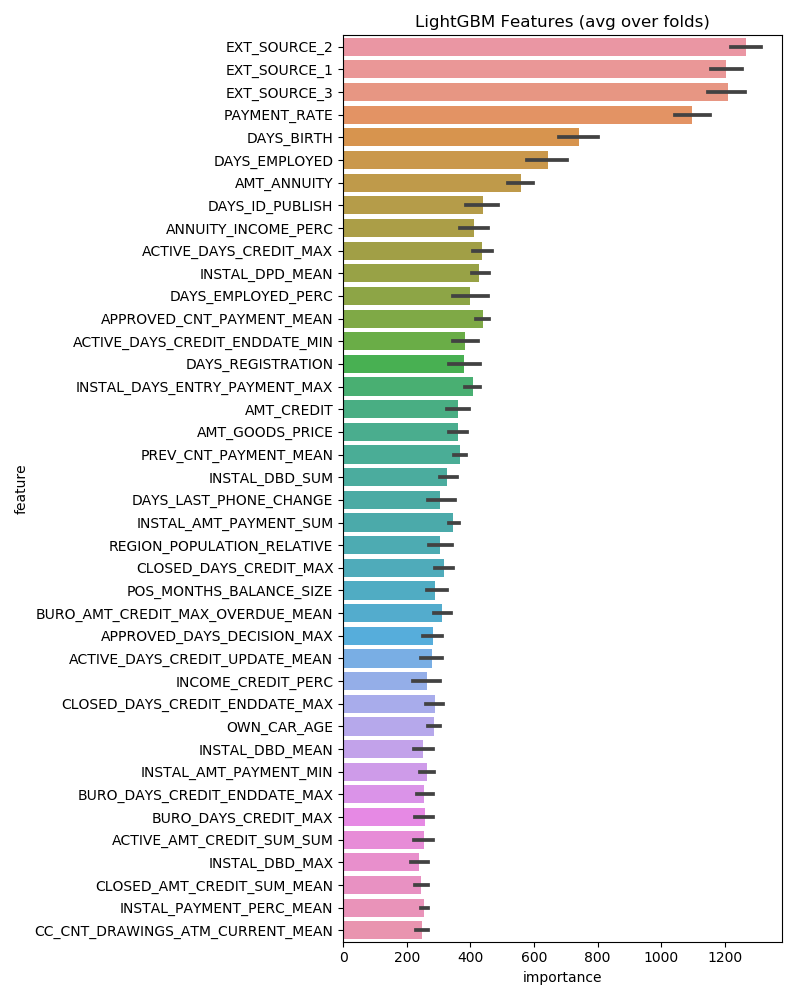

In [42]:
# Create the variable PAYMENT_RATE
train_df['PAYMENT_RATE'] = train_df['AMT_ANNUITY'] / train_df['AMT_CREDIT']

# Create the variable ANNUITY_INCOME_PERC
train_df['ANN_INCOME_PERC'] = train_df['AMT_ANNUITY'] / train_df['AMT_INCOME_TOTAL']

Before moving on, I will convert the columns with dtype object to dtype category

In [43]:
# First let's define the columns that will need label encoding. Anything with dtype 'object'
LABELS = [i for i in train_df if train_df[i].dtype == 'object']

for x in LABELS:
    train_df[x] = train_df[x].astype('category')

### Bureau Dataset

With the bureau data, I expect to find a large amount of null values as it was constructed by grouping multiple entries for each client. However, all of these null values can simply be filled with 0's to indicate that there is no such entry (-1 if 0's are real values).

In [44]:
bureau_df.head()

,SK_ID_CURR,LAST_ONGOING_APP,TOTAL_ONGOING,ONGOING_CREDIT,TOTAL_CLOSED,CLOSED_CREDIT
0,215354,-43.0,3701427.3,6.0,2272518.00,5.0
1,162297,-277.0,7375500.0,3.0,854886.15,3.0
2,402440,-96.0,89910.0,1.0,NaN,NaN
3,238881,-95.0,769500.0,3.0,515739.06,5.0
4,222183,-315.0,5187393.0,5.0,1971567.00,3.0


In [45]:
# Let's start by looking for null values in each column. I'll fill them in with appropriate values
for col in bureau_df:
    print (col, sum(bureau_df[col].isnull()))

SK_ID_CURR 0
LAST_ONGOING_APP 53996
TOTAL_ONGOING 53996
ONGOING_CREDIT 53996
TOTAL_CLOSED 37886
CLOSED_CREDIT 37886


There are A LOT of null values. Let's use .describe() to see if 0's is being used.

In [46]:
bureau_df.describe()

,SK_ID_CURR,LAST_ONGOING_APP,TOTAL_ONGOING,ONGOING_CREDIT,TOTAL_CLOSED,CLOSED_CREDIT
count,305811.000000,251815.000000,2.518150e+05,251815.000000,2.679250e+05,267925.000000
mean,278047.300091,-419.578754,1.334376e+06,2.504247,9.937030e+05,4.028265
std,102849.568343,466.847043,2.358591e+06,1.670734,3.256196e+06,3.379669
min,100001.000000,-2922.000000,0.000000e+00,1.000000,0.000000e+00,1.000000
25%,188878.500000,-520.000000,2.378651e+05,1.000000,1.587060e+05,2.000000
50%,277895.000000,-264.000000,6.606045e+05,2.000000,4.350666e+05,3.000000
75%,367184.500000,-130.000000,1.554508e+06,3.000000,1.083741e+06,5.000000
max,456255.000000,0.000000,3.347397e+08,32.000000,1.017598e+09,108.000000


In [47]:
# It looks like LAST_ONGOING_APP utlizes 0 to represent the clients that applied for credit bureau the day of
# let's see how often this occurs
bureau_df[bureau_df['LAST_ONGOING_APP'] == 0.0].shape

(20, 6)

It appears that this occurs 20 times. As I have no way of determining if this is a valid entry, I will keep the 0's and fill the np.nan with 1's for the LAST_ONGOING_APP column to no ongoing apps.

The TOTAL_ONGOING and TOTAL_CLOSED columns represent the number of open and closed credit accounts the client has. I will fill the null values in these two columns with 0's since null values indicate that they have no history of these accounts.

For the ONGOING_CREDIT and CLOSED_CREDIT, the null values will be filled with 0's as well to indicate no credit.

In [48]:
# Fill LAST_ONGOING_APP null values with +1
bureau_df['LAST_ONGOING_APP'].fillna(1, inplace=True)

# Fill the TOTAL_ONGOING null values with 0's
bureau_df['TOTAL_ONGOING'].fillna(0, inplace=True)

# Fill the TOTAL_CLOSED null values with 0's
bureau_df['TOTAL_CLOSED'].fillna(0, inplace=True)

# Fill the ONGOING_CREDIT null values with 0's
bureau_df['ONGOING_CREDIT'].fillna(0, inplace=True)

# Fill the CLOSED_CREDIT null values with 0's
bureau_df['CLOSED_CREDIT'].fillna(0, inplace=True)

In [49]:
bureau_df.describe()

,SK_ID_CURR,LAST_ONGOING_APP,TOTAL_ONGOING,ONGOING_CREDIT,TOTAL_CLOSED,CLOSED_CREDIT
count,305811.000000,305811.000000,3.058110e+05,305811.000000,3.058110e+05,305811.000000
mean,278047.300091,-345.318605,1.098770e+06,2.062081,8.705962e+05,3.529216
std,102849.568343,452.969960,2.199908e+06,1.791724,3.065360e+06,3.430504
min,100001.000000,-2922.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,188878.500000,-437.000000,8.550000e+04,1.000000,9.000000e+04,1.000000
50%,277895.000000,-201.000000,4.500000e+05,2.000000,3.333046e+05,3.000000
75%,367184.500000,-56.000000,1.291500e+06,3.000000,9.390336e+05,5.000000
max,456255.000000,1.000000,3.347397e+08,32.000000,1.017598e+09,108.000000


In [50]:
# Sanity check to make sure there are no more null values
assert NULL_COLUMNS(bureau_df) == []

Let's explore each column to look for extreme values.

In [51]:
# Sort by LAST_ONGOING_APP and view the head
bureau_df.sort_values('LAST_ONGOING_APP', ascending=True).head()

# Nothing particularly out of the ordinary here. No values will be changed.

,SK_ID_CURR,LAST_ONGOING_APP,TOTAL_ONGOING,ONGOING_CREDIT,TOTAL_CLOSED,CLOSED_CREDIT
191266,352888,-2922.0,31506.3,1.0,0.0,0.0
164925,393346,-2922.0,135000.0,1.0,0.0,0.0
304529,258145,-2922.0,112500.0,1.0,328500.0,2.0
197712,175691,-2922.0,60750.0,1.0,4049923.5,5.0
127197,367343,-2922.0,135000.0,1.0,0.0,0.0


In [52]:
# Sort by TOTAL_ONGOING and view the head
bureau_df.sort_values('TOTAL_ONGOING', ascending=False).head()

# Although the amounts for TOTAL_ONGOING are large, it would be difficult to determine if these are mistakes. No change 

,SK_ID_CURR,LAST_ONGOING_APP,TOTAL_ONGOING,ONGOING_CREDIT,TOTAL_CLOSED,CLOSED_CREDIT
112641,363076,-200.0,334739700.0,4.0,1.368828e+08,15.0
178625,395290,-671.0,270104026.5,3.0,1.001396e+05,2.0
264431,411092,-183.0,161055000.0,3.0,1.125000e+07,2.0
261961,192716,-42.0,123324439.5,19.0,2.632317e+07,11.0
80209,169764,-715.0,104220000.0,3.0,8.537408e+05,4.0


In [53]:
# Sort by ONGOING_CREDIT and view the head
bureau_df.sort_values('ONGOING_CREDIT', ascending=False).head()

# Nothing particularly out of the ordinary here. No values will be changed.

,SK_ID_CURR,LAST_ONGOING_APP,TOTAL_ONGOING,ONGOING_CREDIT,TOTAL_CLOSED,CLOSED_CREDIT
94440,329272,-10.0,1.430982e+07,32.0,3696489.00,16.0
62306,150685,-107.0,2.738085e+06,22.0,940725.72,11.0
24120,371490,-2.0,1.504647e+07,22.0,2891567.25,25.0
113485,145911,-130.0,7.513006e+06,20.0,477810.00,3.0
125007,324532,-304.0,2.830410e+06,19.0,0.00,0.0


In [54]:
# Sort by TOTAL_CLOSED and view the head
bureau_df.sort_values('TOTAL_CLOSED', ascending=False).head()

# Nothing particularly out of the ordinary here. No values will be changed.

,SK_ID_CURR,LAST_ONGOING_APP,TOTAL_ONGOING,ONGOING_CREDIT,TOTAL_CLOSED,CLOSED_CREDIT
159426,442645,-291.0,360000.0,2.0,1.017598e+09,12.0
283668,386819,-271.0,3487500.0,2.0,6.056770e+08,9.0
195623,325979,1.0,0.0,0.0,3.961447e+08,2.0
266636,449617,1.0,0.0,0.0,2.720182e+08,7.0
35866,220572,-334.0,69210000.0,4.0,2.600160e+08,16.0


In [55]:
# Sort by CLOSED_CREDIT and view the head
bureau_df.sort_values('CLOSED_CREDIT', ascending=False).head()

# Nothing particularly out of the ordinary here. No values will be changed.

,SK_ID_CURR,LAST_ONGOING_APP,TOTAL_ONGOING,ONGOING_CREDIT,TOTAL_CLOSED,CLOSED_CREDIT
27027,120860,-14.0,977620.50,8.0,8250141.555,108.0
210809,169704,-18.0,3642324.84,10.0,4646468.970,84.0
34074,318065,-30.0,2136960.00,12.0,5485423.905,66.0
82218,425396,-17.0,72000.00,2.0,1674000.000,58.0
131019,295809,-29.0,195750.00,3.0,1657638.675,56.0


In [56]:
# Write this to an intermediate csv for merging with test data.
bureau_df.to_csv('./Intermediate_Data//cleaned_bureau.csv', encoding='utf-8')

### Credit Card Dataset

In [57]:
credit_df.head()

,SK_ID_CURR,MONTHS_BALANCE,SK_DPD,NET_PAID
0,100006,-1,0,0.000
1,100011,-2,0,154485.000
2,100013,-1,1,82948.545
3,100021,-2,0,0.000
4,100023,-4,0,0.000


In [58]:
# Let's start by looking for null values in each column. I'll fill them in with appropriate values
for col in credit_df:
    print (col, sum(credit_df[col].isnull()))

SK_ID_CURR 0
MONTHS_BALANCE 0
SK_DPD 0
NET_PAID 0


In [59]:
credit_df.describe()

,SK_ID_CURR,MONTHS_BALANCE,SK_DPD,NET_PAID
count,103558.000000,103558.000000,103558.000000,1.035580e+05
mean,278381.457956,-1.518965,344.272572,5.765347e+03
std,102779.519683,0.734817,3846.103587,1.703542e+05
min,100006.000000,-12.000000,0.000000,-1.260383e+06
25%,189536.250000,-2.000000,0.000000,-3.346338e+04
50%,278649.000000,-1.000000,0.000000,0.000000e+00
75%,367690.000000,-1.000000,0.000000,5.985000e+04
max,456250.000000,-1.000000,150483.000000,5.577479e+06


In [60]:
# Sanity check to make sure there are no more null values
assert NULL_COLUMNS(credit_df) == []

Since there are no null values, I'll jump straight to looking for outliers. 

As the NET_PAID column describes the sum(paid - spent) across 12 months, I expect to see both negative and positive values. Although the values do look extreme, it would be difficult to invalidate any of the entries. I will still explore it, but I do not expect to change any values.

SK_DPD has a huge outlier at 150483.0. The column is the sum of all the days past due for each month's payment. Since 150483 is well over 12 months, I expect this to be an invalid input.

In [61]:
# Sort by NET_PAID and view the head
credit_df.sort_values('NET_PAID', ascending=False).head()

# Nothing particularly out of the ordinary here. No values will be changed.

,SK_ID_CURR,MONTHS_BALANCE,SK_DPD,NET_PAID
2898,110121,-2,0,5577479.280
43812,251071,-2,0,2078097.525
44521,253593,-1,0,1854699.840
101731,450066,-2,0,1350000.000
19134,166109,-1,0,1261292.895


In [62]:
# Sort by NET_PAID and view the head
credit_df.sort_values('NET_PAID', ascending=True).head()

# Nothing particularly out of the ordinary here. No values will be changed.

,SK_ID_CURR,MONTHS_BALANCE,SK_DPD,NET_PAID
72036,348429,-1,0,-1260382.905
39054,234245,-2,0,-1244425.410
60254,307681,-1,0,-1225695.465
15270,152886,-1,0,-1191001.320
78039,368984,-2,0,-1130691.420


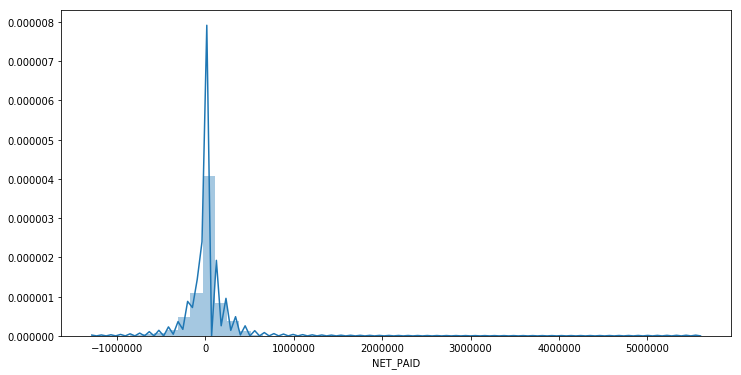

In [63]:
# Let's do a quick distplot of the data
figure = plt.figure(figsize=(12,6))
sns.distplot(credit_df['NET_PAID'])

# From the plot, the NET_PAID column is visibly skewed. It has extremes on both ends of the data.

In [64]:
# Sort by SK_DPD and view the head
credit_df.sort_values('SK_DPD', ascending=False).head()

,SK_ID_CURR,MONTHS_BALANCE,SK_DPD,NET_PAID
96264,431114,-4,150483,0.00
14805,151276,-1,133147,54.00
93663,423050,-1,127548,2542.50
24509,184984,-2,127515,103.50
98650,439283,-2,124849,1160.37


In [65]:
credit_df[credit_df['SK_DPD'] > 3650].shape #3650 for 10 years

(1146, 4)

Although I believe that SK_DPD values this extreme should be invalid, there appears to be more data consistently that extreme.
As a result, I won't change anything in that column either.

In [66]:
# Write this to an intermediate csv for merging with test data.
credit_df.to_csv('./Intermediate_Data//cleaned_credit.csv', encoding='utf-8')

### Previous Applications & Installments Dataset 

In [67]:
prev_instal_df.head()

,SK_ID_CURR,AMT_CREDIT,DAYS_DECISION,DAYS_TERMINATION,NET_PAYMENT,PAYMENT_TIME
0,100001,95148.0,-1740,-1612.0,0.0,-62.0
1,100002,3402045.0,-606,-17.0,0.0,-388.0
2,100003,10159641.0,-746,-527.0,0.0,-179.0
3,100004,60318.0,-815,-714.0,0.0,-23.0
4,100005,361381.5,-757,-460.0,0.0,-212.0


In [68]:
# Let's start by looking for null values in each column. I'll fill them in with appropriate values
for col in prev_instal_df:
    print (col, sum(prev_instal_df[col].isnull()))

SK_ID_CURR 0
AMT_CREDIT 0
DAYS_DECISION 0
DAYS_TERMINATION 0
NET_PAYMENT 0
PAYMENT_TIME 0


In [69]:
# Sanity check to make sure there are no more null values
assert NULL_COLUMNS(prev_instal_df) == []

Since there are no null values, let's proceed to looking for outliers.

Note that DAYS_DECISIONS indicates when was the the client's last approved application and DAYS_TERMINATION indicates when is the client's exptected termination date. NET_PAYMENT refers to how much client pays relative to installment demanded. PAYMENT_TIME refers to if client pays installments on time, early, or late.

The DAYS_TERMINATION in this column appears to have 365243.0 entry similar to DAYS_EMPLOYED in the previous tables. In this case, the 365243.0 value is a placeholder representing that the client has an ongoing application that has not completed. I will represent ongoing application as 0.0.

In [70]:
prev_instal_df.describe()

,SK_ID_CURR,AMT_CREDIT,DAYS_DECISION,DAYS_TERMINATION,NET_PAYMENT,PAYMENT_TIME
count,336165.000000,3.361650e+05,336165.000000,336165.000000,3.361650e+05,336165.000000
mean,278133.680336,7.263656e+06,-620.983559,164358.024857,9.012965e+03,-324.841944
std,102882.335317,1.129114e+07,565.168900,182028.028242,1.782217e+05,375.152867
min,100001.000000,9.621000e+03,-2922.000000,-2852.000000,-3.037736e+06,-10529.000000
25%,189038.000000,9.698130e+05,-758.000000,-402.000000,-1.372865e+04,-425.000000
50%,278197.000000,2.770772e+06,-451.000000,-53.000000,0.000000e+00,-226.000000
75%,367289.000000,8.270942e+06,-257.000000,365243.000000,0.000000e+00,-112.000000
max,456255.000000,2.392762e+08,-1.000000,365243.000000,4.417384e+06,11502.000000


In [71]:
# Sort by SK_DPD and view the head
prev_instal_df.sort_values('AMT_CREDIT', ascending=False).head()

# Although the values are high, there is nothing out of the ordinary. No values will be changed.

,SK_ID_CURR,AMT_CREDIT,DAYS_DECISION,DAYS_TERMINATION,NET_PAYMENT,PAYMENT_TIME
303970,422431,239276232.0,-449,365243.0,2333965.590,-981.0
232261,346243,221057397.0,-1056,365243.0,1310508.495,-1112.0
55285,158498,217269967.5,-547,-326.0,-399351.780,-427.0
216832,329899,210635145.0,-2203,-844.0,-1945041.120,-434.0
123210,230544,200619774.0,-713,-19.0,-14668.515,-1393.0


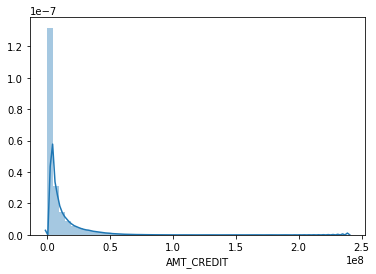

In [72]:
# Plot the AMT_CREDIT
sns.distplot(prev_instal_df['AMT_CREDIT'])

# Strong right skew.

In [73]:
# Sort by SK_DPD and view the head
prev_instal_df.sort_values('AMT_CREDIT', ascending=False).head()

# Although the values are high, there is nothing out of the ordinary. No values will be changed.

,SK_ID_CURR,AMT_CREDIT,DAYS_DECISION,DAYS_TERMINATION,NET_PAYMENT,PAYMENT_TIME
303970,422431,239276232.0,-449,365243.0,2333965.590,-981.0
232261,346243,221057397.0,-1056,365243.0,1310508.495,-1112.0
55285,158498,217269967.5,-547,-326.0,-399351.780,-427.0
216832,329899,210635145.0,-2203,-844.0,-1945041.120,-434.0
123210,230544,200619774.0,-713,-19.0,-14668.515,-1393.0


In [74]:
# Check the occurence of DAYS_TERMINATION
prev_instal_df[prev_instal_df['DAYS_TERMINATION'] == 365243.0].shape

# We can see that there are over 150,000 entries with this value.

(151567, 6)

In [75]:
# Replace all values of 365243.0 with 0.0
prev_instal_df.loc[prev_instal_df['DAYS_TERMINATION'] == 365243.0, 'DAYS_TERMINATION'] = 0.0

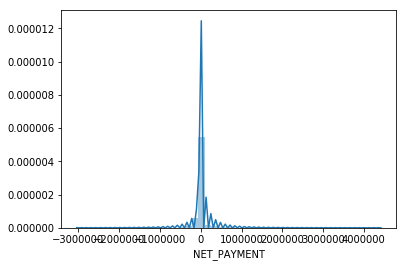

In [76]:
# Plot the NET_PAYMENT
sns.distplot(prev_instal_df['NET_PAYMENT'])

# The distribution looks close to normal, but there are strong outliers on both sides. No change will be made.

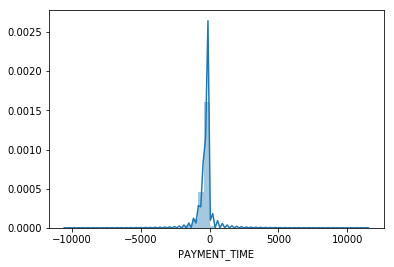

In [77]:
# Plot the PAYMENT_TIME
sns.distplot(prev_instal_df['PAYMENT_TIME'])

# The distribution looks close to normal, but there are strong outliers on both sides. No change will be made.

In [78]:
# Write this to an intermediate csv for merging with test data.
prev_instal_df.to_csv('./Intermediate_Data//cleaned_prev_instal.csv', encoding='utf-8')

# Merging Datasets

Now that I've cleaned all the separate datasets. It's time to merge them together. 

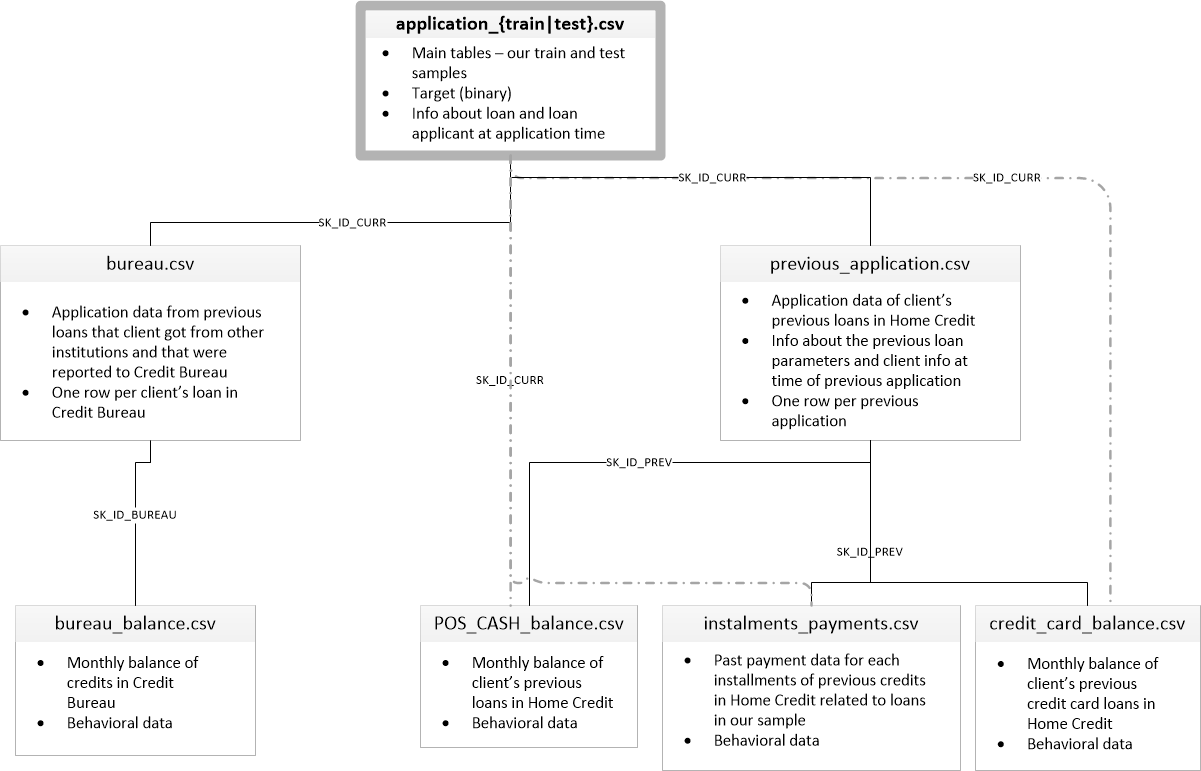

I will perform a left merge all the supplemental datasets to the training data on 'SK_ID_CURR'. I will be using left merge because I want all unique client ids provided in the training data, regardless of if additional data is provided or not.

I will be expecting newnull values appear in between each merge. I will address them immediately before moving onto the next dataset. 

### Merge Training Data and Bureau Data

In [79]:
# Merge the training data and bureau data
train_bureau = train_df.merge(bureau_df, how='left', on='SK_ID_CURR')

# Sanity check to make sure no unique SK_ID_CURR from the training data is lost
assert train_df['SK_ID_CURR'].nunique() == train_bureau['SK_ID_CURR'].nunique()

# Sanity check to check if all columns were added
assert len(train_bureau.columns) == (len(train_df.columns) + len(bureau_df.columns) - 1)

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 31 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null category
FLAG_OWN_REALTY               307511 non-null category
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307511 non-null float64
AMT_GOODS_PRICE               307511 non-null float64
NAME_TYPE_SUITE               307511 non-null int64
NAME_INCOME_TYPE              307511 non-null category
NAME_EDUCATION_TYPE           307511 non-null category
NAME_FAMILY_STATUS            307511 non-null category
NAME_HOUSING_TYPE             307511 non-null category
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307511 non-null int64
DAYS_EMPLOYED                

In [81]:
# Check for null values
NULL_COLUMNS(train_bureau)

['LAST_ONGOING_APP',
 'TOTAL_ONGOING',
 'ONGOING_CREDIT',
 'TOTAL_CLOSED',
 'CLOSED_CREDIT']

In [82]:
for col in NULL_COLUMNS(train_bureau):
    print (col, sum(train_bureau[col].isnull()))

LAST_ONGOING_APP 44020
TOTAL_ONGOING 44020
ONGOING_CREDIT 44020
TOTAL_CLOSED 44020
CLOSED_CREDIT 44020


In [83]:
train_df[['SK_ID_CURR']].describe()

,SK_ID_CURR
count,307511.000000
mean,278180.518577
std,102790.175348
min,100002.000000
25%,189145.500000
50%,278202.000000
75%,367142.500000
max,456255.000000


In [84]:
bureau_df[['SK_ID_CURR']].describe()

,SK_ID_CURR
count,305811.000000
mean,278047.300091
std,102849.568343
min,100001.000000
25%,188878.500000
50%,277895.000000
75%,367184.500000
max,456255.000000


### 44020 EMPTY SK_ID_CURR?!?! 
That's a lot more than I expected, but it's within range of possible different values.

To calculate: on bureau_df: max - count - std = potential differences

I believe that these empty SK_ID_CURR's  have no past application history. This shouldn't be surprising as that's what I'm making this model for anyways.

Let's move onto filling in the null values now. I'll be using the same fill in methods I used previously to show missing information.

{'LAST_ONGOING_APP': -1,
'TOTAL_ONGOING': 0,
'ONGOING_CREDIT': 0,
'TOTAL_CLOSED': 0,
'CLOSED_CREDIT': 0}

In [85]:
# Fill np.nan in LAST_ONGOING_APP with -1's
train_bureau['LAST_ONGOING_APP'].fillna(-1, inplace=True)

# Fill np.nan in TOTAL_ONGOING with 0's
train_bureau['TOTAL_ONGOING'].fillna(0, inplace=True)

# Fill np.nan in ONGOING_CREDIT with 0's
train_bureau['ONGOING_CREDIT'].fillna(0, inplace=True)

# Fill np.nan in TOTAL_CLOSED  with 0's
train_bureau['TOTAL_CLOSED'].fillna(0, inplace=True)

# Fill np.nan in CLOSED_CREDIT with 0's
train_bureau['CLOSED_CREDIT'].fillna(0, inplace=True)

In [86]:
# Sanity check to make sure there are no more null values
assert NULL_COLUMNS(train_bureau) == []

### Merge with Credit Dataset

In [87]:
# Merge the train_bureau with credit_df using a left merge
Tr_Br_Cr = train_bureau.merge(credit_df, how='left', on='SK_ID_CURR')

# Sanity check to make sure no unique SK_ID_CURR from the training data is lost
assert train_df['SK_ID_CURR'].nunique() == Tr_Br_Cr['SK_ID_CURR'].nunique()

# Sanity check to check if all columns were added
assert len(Tr_Br_Cr.columns) == (len(train_bureau.columns) + len(credit_df.columns) - 1)

In [88]:
# Check for null values
NULL_COLUMNS(Tr_Br_Cr)

['MONTHS_BALANCE', 'SK_DPD', 'NET_PAID']

In [89]:
for col in NULL_COLUMNS(Tr_Br_Cr):
    print (col, sum(Tr_Br_Cr[col].isnull()))

MONTHS_BALANCE 220606
SK_DPD 220606
NET_PAID 220606


In [90]:
credit_df.describe()

,SK_ID_CURR,MONTHS_BALANCE,SK_DPD,NET_PAID
count,103558.000000,103558.000000,103558.000000,1.035580e+05
mean,278381.457956,-1.518965,344.272572,5.765347e+03
std,102779.519683,0.734817,3846.103587,1.703542e+05
min,100006.000000,-12.000000,0.000000,-1.260383e+06
25%,189536.250000,-2.000000,0.000000,-3.346338e+04
50%,278649.000000,-1.000000,0.000000,0.000000e+00
75%,367690.000000,-1.000000,0.000000,5.985000e+04
max,456250.000000,-1.000000,150483.000000,5.577479e+06


### 220606 EMPTY SK_ID_CURR?!?! 
Here I thought 44020 was a lot!

Surprisingly, this is also within the range of possible differences

To reiterate: from credit_df: max - min - count = potential differences > 220606

Let's move onto filling in the null values now. 

Fill np.nan according to: 
{'MONTHS_BALANCE' : 0, 
'SK_DPD': 0,
'NET_PAID': 0}

Note that all np.nan values represent lack of a previous account. In this case, I'm using 0's for both SK_DPD and NET_PAID, which suggests that they are equivalent to other clients who have made their exact payments on time for the past 12 months. This may cause misrepresent the data as the two groups are not the same. However, if I used any other value, it would provide the new client with either a negative or positive advantage.

In [91]:
# Fill the np.nan's in MONTHS_BALANCE with 0's
Tr_Br_Cr['MONTHS_BALANCE'].fillna(0, inplace=True)

# Fill the np.nan's in SK_DPD with 0's
Tr_Br_Cr['SK_DPD'].fillna(0, inplace=True)

# Fill the np.nan's in NET_PAID with 0's
Tr_Br_Cr['NET_PAID'].fillna(0, inplace=True)

In [92]:
# Sanity check to make sure there are no more null values
assert NULL_COLUMNS(Tr_Br_Cr) == []

In [93]:
prev_instal_df.head()

,SK_ID_CURR,AMT_CREDIT,DAYS_DECISION,DAYS_TERMINATION,NET_PAYMENT,PAYMENT_TIME
0,100001,95148.0,-1740,-1612.0,0.0,-62.0
1,100002,3402045.0,-606,-17.0,0.0,-388.0
2,100003,10159641.0,-746,-527.0,0.0,-179.0
3,100004,60318.0,-815,-714.0,0.0,-23.0
4,100005,361381.5,-757,-460.0,0.0,-212.0


### Merge with Previous Applications & Installments

In [94]:
# Rename the AMT_CREDIT column to PREV_CREDIT to avoid overlapping columns
prev_instal_df.columns = ['SK_ID_CURR', 'PREV_CREDIT', 'DAYS_DECISION',
                         'DAYS_TERMINATION', 'NET_PAYMENT', 'PAYMENT_TIME']

In [95]:
# Merge the train_bureau with credit_df using a left merge
merged_train = Tr_Br_Cr.merge(prev_instal_df, how='left', on='SK_ID_CURR')

# Sanity check to make sure no unique SK_ID_CURR from the training data is lost
assert train_df['SK_ID_CURR'].nunique() == merged_train['SK_ID_CURR'].nunique()

# Sanity check to check if all columns were added
assert len(merged_train.columns) == (len(Tr_Br_Cr.columns) + len(prev_instal_df.columns) - 1)

In [96]:
# Check for null values
NULL_COLUMNS(merged_train)

['PREV_CREDIT',
 'DAYS_DECISION',
 'DAYS_TERMINATION',
 'NET_PAYMENT',
 'PAYMENT_TIME']

In [97]:
for col in NULL_COLUMNS(merged_train):
    print (col, sum(merged_train[col].isnull()))

PREV_CREDIT 18825
DAYS_DECISION 18825
DAYS_TERMINATION 18825
NET_PAYMENT 18825
PAYMENT_TIME 18825


In [98]:
prev_instal_df.describe()

,SK_ID_CURR,PREV_CREDIT,DAYS_DECISION,DAYS_TERMINATION,NET_PAYMENT,PAYMENT_TIME
count,336165.000000,3.361650e+05,336165.000000,336165.000000,3.361650e+05,336165.000000
mean,278133.680336,7.263656e+06,-620.983559,-319.397781,9.012965e+03,-324.841944
std,102882.335317,1.129114e+07,565.168900,535.672169,1.782217e+05,375.152867
min,100001.000000,9.621000e+03,-2922.000000,-2852.000000,-3.037736e+06,-10529.000000
25%,189038.000000,9.698130e+05,-758.000000,-402.000000,-1.372865e+04,-425.000000
50%,278197.000000,2.770772e+06,-451.000000,-53.000000,0.000000e+00,-226.000000
75%,367289.000000,8.270942e+06,-257.000000,0.000000,0.000000e+00,-112.000000
max,456255.000000,2.392762e+08,-1.000000,0.000000,4.417384e+06,11502.000000


The least empty SK_ID_CURR thus far at 18,825!

The acceptable range of differences is 20089 according to the calculation methods listed above. These values are within what we can expect.

Let's move onto filling the null values

{'PREV_CREDIT': 0,
'DAYS_DECISION': 0,
'DAYS_TERMINATION': 0,
'NET_PAYMENT': 0,
'PAYMENT_TIME': 0}

Similar to the dilemma above, 0's for NET_PAYMENT and PAYMENT_TIME make the new client appear as they have made all their payments on time without any missing surplus amounts. This can cause a misrepresentation as the two groups are not the same. However, any other valud with cause bias.

In [99]:
# Let's fill the null values

# Fill the np.nan's in PREV_CREDIT with 0's
merged_train['PREV_CREDIT'].fillna(0, inplace=True)

# Fill the np.nan's in DAYS_DECISION with 0's
merged_train['DAYS_DECISION'].fillna(0, inplace=True)

# Fill the np.nan's in DAYS_TERMINATION with 0's
merged_train['DAYS_TERMINATION'].fillna(0, inplace=True)

# Fill the np.nan's in NET_PAYMENT with 0's
merged_train['NET_PAYMENT'].fillna(0, inplace=True)

# Fill the np.nan's in PAYMENT_TIME with 0's
merged_train['PAYMENT_TIME'].fillna(0, inplace=True)

In [100]:
# Sanity check to make sure there are no more null values
assert NULL_COLUMNS(merged_train) == []

Awesome! Now that I have finished all the data wrangling and feature engineering, let's take a look at the merged training data one last time and write it to another csv to work on in the EDA notebook.

In [101]:
# Let's check the info of the dataset
merged_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 44 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null category
FLAG_OWN_REALTY               307511 non-null category
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307511 non-null float64
AMT_GOODS_PRICE               307511 non-null float64
NAME_TYPE_SUITE               307511 non-null int64
NAME_INCOME_TYPE              307511 non-null category
NAME_EDUCATION_TYPE           307511 non-null category
NAME_FAMILY_STATUS            307511 non-null category
NAME_HOUSING_TYPE             307511 non-null category
REGION_POPULATION_RELATIVE    307511 non-null float64
DAYS_BIRTH                    307511 non-null int64
DAYS_EMPLOYED                

In [102]:
# Before moving on, I need to convert VALID_MOBILE from dtype bool to dtype category
merged_train['VALID_MOBILE'] = merged_train['VALID_MOBILE'].astype('category')

307,511 rows and 37 columns! This is still a lot, but it could work. As a reminder, I will be working with a mixture of numerical and category columns. The category columns consist of labels too so I'm going to need to perform LabelEncoder on those later.

In [103]:
# Write merged_train to a csv
merged_train.to_csv('./Intermediate_Data/merged_train.csv', encoding='utf-8')